+ Name: Vanshita
+ Roll Number: 2021101102

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway
import pingouin as pg

In [3]:
# Create DataFrame

data = {
    'Home School': [89, 75, 49, 87, 84, 68, 88, 78, 77, 93, 67, 79, 69, 88, 91],
    'Boarding School': [85, 78, 59, 77, 63, 88, 71, 73, 69, 80, 72, 68, 66, 59, 70],
    'Day School': [91, 88, 84, 81, 91, 75, 69, 93, 95, 85, 87, 84, 83, 80, 77]
}

df = pd.DataFrame(data)
df

,Home School,Boarding School,Day School
0,89,85,91
1,75,78,88
2,49,59,84
3,87,77,81
4,84,63,91
5,68,88,75
6,88,71,69
7,78,73,93
8,77,69,95
9,93,80,85


In [4]:
home = df['Home School']
boarding = df['Boarding School']
day = df['Day School']

#### Normality check

In [5]:
from scipy.stats import shapiro

normality_results = {}
for column in df.columns:
    stat, p = shapiro(df[column])
    normality_results[column] = {'p-value': p, 'Normal': p > 0.05}

print("Normality Results:")
print(pd.DataFrame(normality_results).T)

Normality Results:
                  p-value Normal
Home School      0.115225   True
Boarding School  0.846614   True
Day School       0.922713   True


#### Homogeneity of variances

In [6]:
statistic, pvalue = levene(home, boarding, day)

print("Levene's test statistic:", statistic)
print("p-value:", pvalue)

Levene's test statistic: 1.6476912738792358
p-value: 0.20469278196960214


#### One - way Anova

In [7]:
# Perform one-way ANOVA
statistic, p_value = f_oneway(home, boarding, day)

print(f'One-way ANOVA statistic: {statistic}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print('The one-way ANOVA suggests that there are significant differences in exam performance among the groups.')
else:
    print('The one-way ANOVA suggests that there are no significant differences in exam performance among the groups.')

One-way ANOVA statistic: 6.475922406683641
p-value: 0.003536773789503349
The one-way ANOVA suggests that there are significant differences in exam performance among the groups.


#### Post-hoc - Tukey HSD

In [16]:
df_melt = df.melt(var_name='School_Type', value_name='Grade')
# tukey_results = pairwise_tukeyhsd(df_melt['Grade'], df_melt['School_Type'])
tukey_results = pg.pairwise_tukey(dv = 'Grade', between = 'School_Type', data = df_melt)
tukey_results

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Boarding School,Day School,71.866667,84.2,-12.333333,3.435821,-3.589632,0.002428,-1.521316
1,Boarding School,Home School,71.866667,78.8,-6.933333,3.435821,-2.017955,0.120355,-0.650406
2,Day School,Home School,84.200000,78.8,5.400000,3.435821,1.571677,0.268965,0.536759


### **Inference**

+ The table indicates that there is a statistically significant difference in means between "Boarding School" and "Day School" (meandiff = -12.3333, p-adj < 0.05).

+ Therefore, we reject the null hypothesis and conclude that there is a significant difference in grades between students from boarding school and day school, with Regular say school students performing significantly better.

+ However, there is no significant difference in means between "Boarding School" and "Home School" (p > 0.05) or between "Day School" and "Home School" (p > 0.05).

#### Plot analyzed data

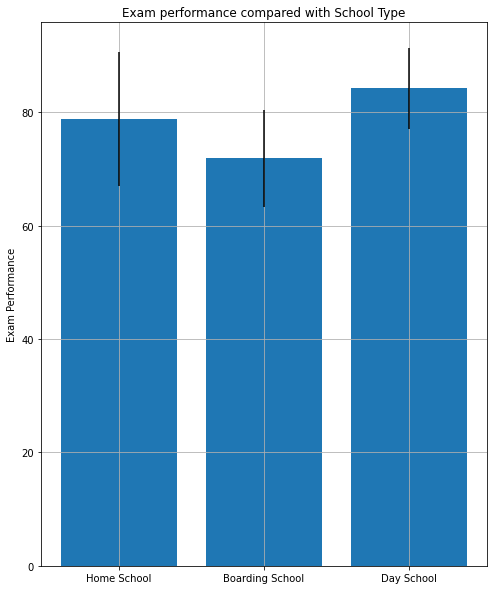

In [20]:
plt.figure(figsize=(8, 10)) 

plt.bar(df.columns, df.mean(), yerr = df.std())
plt.ylabel("Exam Performance")
plt.grid(True)
plt.title("Exam performance compared with School Type")
plt.show()